<a href="https://www.kaggle.com/code/adithyar3363/credit-card-fraud-detection?scriptVersionId=197936821" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
#from xgboost import XGBClassifier
#import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
df_train = pd.read_csv('/kaggle/input/creditcard-dataset/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0


In [127]:
df_test = pd.read_csv('/kaggle/input/creditcard-dataset/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.8600,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.9864,-81.2007,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.8400,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4505,-109.9604,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.2800,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.4958,-74.1961,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.0500,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8124,-80.8831,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.1900,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.9591,-85.8847,0


In [128]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [129]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000
mean,648337.0000,417192042079726656.0000,70.3510,48800.6711,38.5376,-90.2263,88824.4406,1349243636.7261,38.5373,-90.2265,0.0058
std,374317.9745,1308806447000240384.0000,160.3160,26893.2225,5.0758,13.7591,301956.3607,12841278.4234,5.1098,13.7711,0.0759
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
25%,324168.5000,180042946491150.0000,9.6500,26237.0000,34.6205,-96.7980,743.0000,1338750742.5000,34.7336,-96.8973,0.0000
50%,648337.0000,3521417320836166.0000,47.5200,48174.0000,39.3543,-87.4769,2456.0000,1349249747.0000,39.3657,-87.4384,0.0000
75%,972505.5000,4642255475285942.0000,83.1400,72042.0000,41.9404,-80.1580,20328.0000,1359385375.5000,41.9572,-80.2368,0.0000
max,1296674.0000,4992346398065154048.0000,28948.9000,99783.0000,66.6933,-67.9503,2906700.0000,1371816817.0000,67.5103,-66.9509,1.0000


In [130]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000,555719.0000
mean,277859.0000,417838695528764096.0000,69.3928,48842.6280,38.5433,-90.2313,88221.8879,1380678865.1668,38.5428,-90.2314,0.0039
std,160422.4015,1309836622980612608.0000,156.7459,26855.2833,5.0613,13.7218,300390.8921,5201104.0659,5.0958,13.7331,0.0620
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1371816865.0000,19.0274,-166.6716,0.0000
25%,138929.5000,180042946491150.0000,9.6300,26292.0000,34.6689,-96.7980,741.0000,1376028627.5000,34.7553,-96.9051,0.0000
50%,277859.0000,3521417320836166.0000,47.2900,48174.0000,39.3716,-87.4769,2408.0000,1380761988.0000,39.3766,-87.4452,0.0000
75%,416788.5000,4635330563105903.0000,83.0100,72011.0000,41.8948,-80.1752,19685.0000,1385866984.0000,41.9542,-80.2646,0.0000
max,555718.0000,4992346398065154048.0000,22768.1100,99921.0000,65.6899,-67.9503,2906700.0000,1388534374.0000,66.6793,-66.9520,1.0000


In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [133]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

There are no null values. Hence we can proceed without doing any missing value treatments

In [134]:
#Check the fraud/Non_Fraud related records
df_train['is_fraud'].value_counts()

0    1289169
1    7506   
Name: is_fraud, dtype: int64

In [135]:
#find % values of frauds
(df_train.groupby('is_fraud')['is_fraud'].count()/df_train['is_fraud'].count()) *100

is_fraud
0   99.4211
1   0.5789 
Name: is_fraud, dtype: float64

In [136]:
df_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                   983    
merchant                 693    
category                 14     
amt                      52928  
first                    352    
last                     481    
gender                   2      
street                   983    
city                     894    
state                    51     
zip                      970    
lat                      968    
long                     969    
city_pop                 879    
job                      494    
dob                      968    
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                 2      
dtype: int64

In [137]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df_train.corr()
cor

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.0000,0.0004,-0.0003,0.0007,0.0006,-0.0007,-0.0017,0.9990,0.0005,-0.0007,-0.0048
cc_num,0.0004,1.0000,0.0018,0.0415,-0.0593,-0.0483,-0.0090,0.0004,-0.0589,-0.0483,-0.0010
amt,-0.0003,0.0018,1.0000,0.0018,-0.0019,-0.0002,0.0058,-0.0003,-0.0019,-0.0002,0.2194
zip,0.0007,0.0415,0.0018,1.0000,-0.1143,-0.9097,0.0785,0.0007,-0.1136,-0.9089,-0.0022
lat,0.0006,-0.0593,-0.0019,-0.1143,1.0000,-0.0155,-0.1557,0.0006,0.9936,-0.0155,0.0019
long,-0.0007,-0.0483,-0.0002,-0.9097,-0.0155,1.0000,-0.0527,-0.0006,-0.0155,0.9991,0.0017
city_pop,-0.0017,-0.0090,0.0058,0.0785,-0.1557,-0.0527,1.0000,-0.0017,-0.1548,-0.0527,0.0021
unix_time,0.9990,0.0004,-0.0003,0.0007,0.0006,-0.0006,-0.0017,1.0000,0.0006,-0.0006,-0.0051
merch_lat,0.0005,-0.0589,-0.0019,-0.1136,0.9936,-0.0155,-0.1548,0.0006,1.0000,-0.0154,0.0017
merch_long,-0.0007,-0.0483,-0.0002,-0.9089,-0.0155,0.9991,-0.0527,-0.0006,-0.0154,1.0000,0.0017


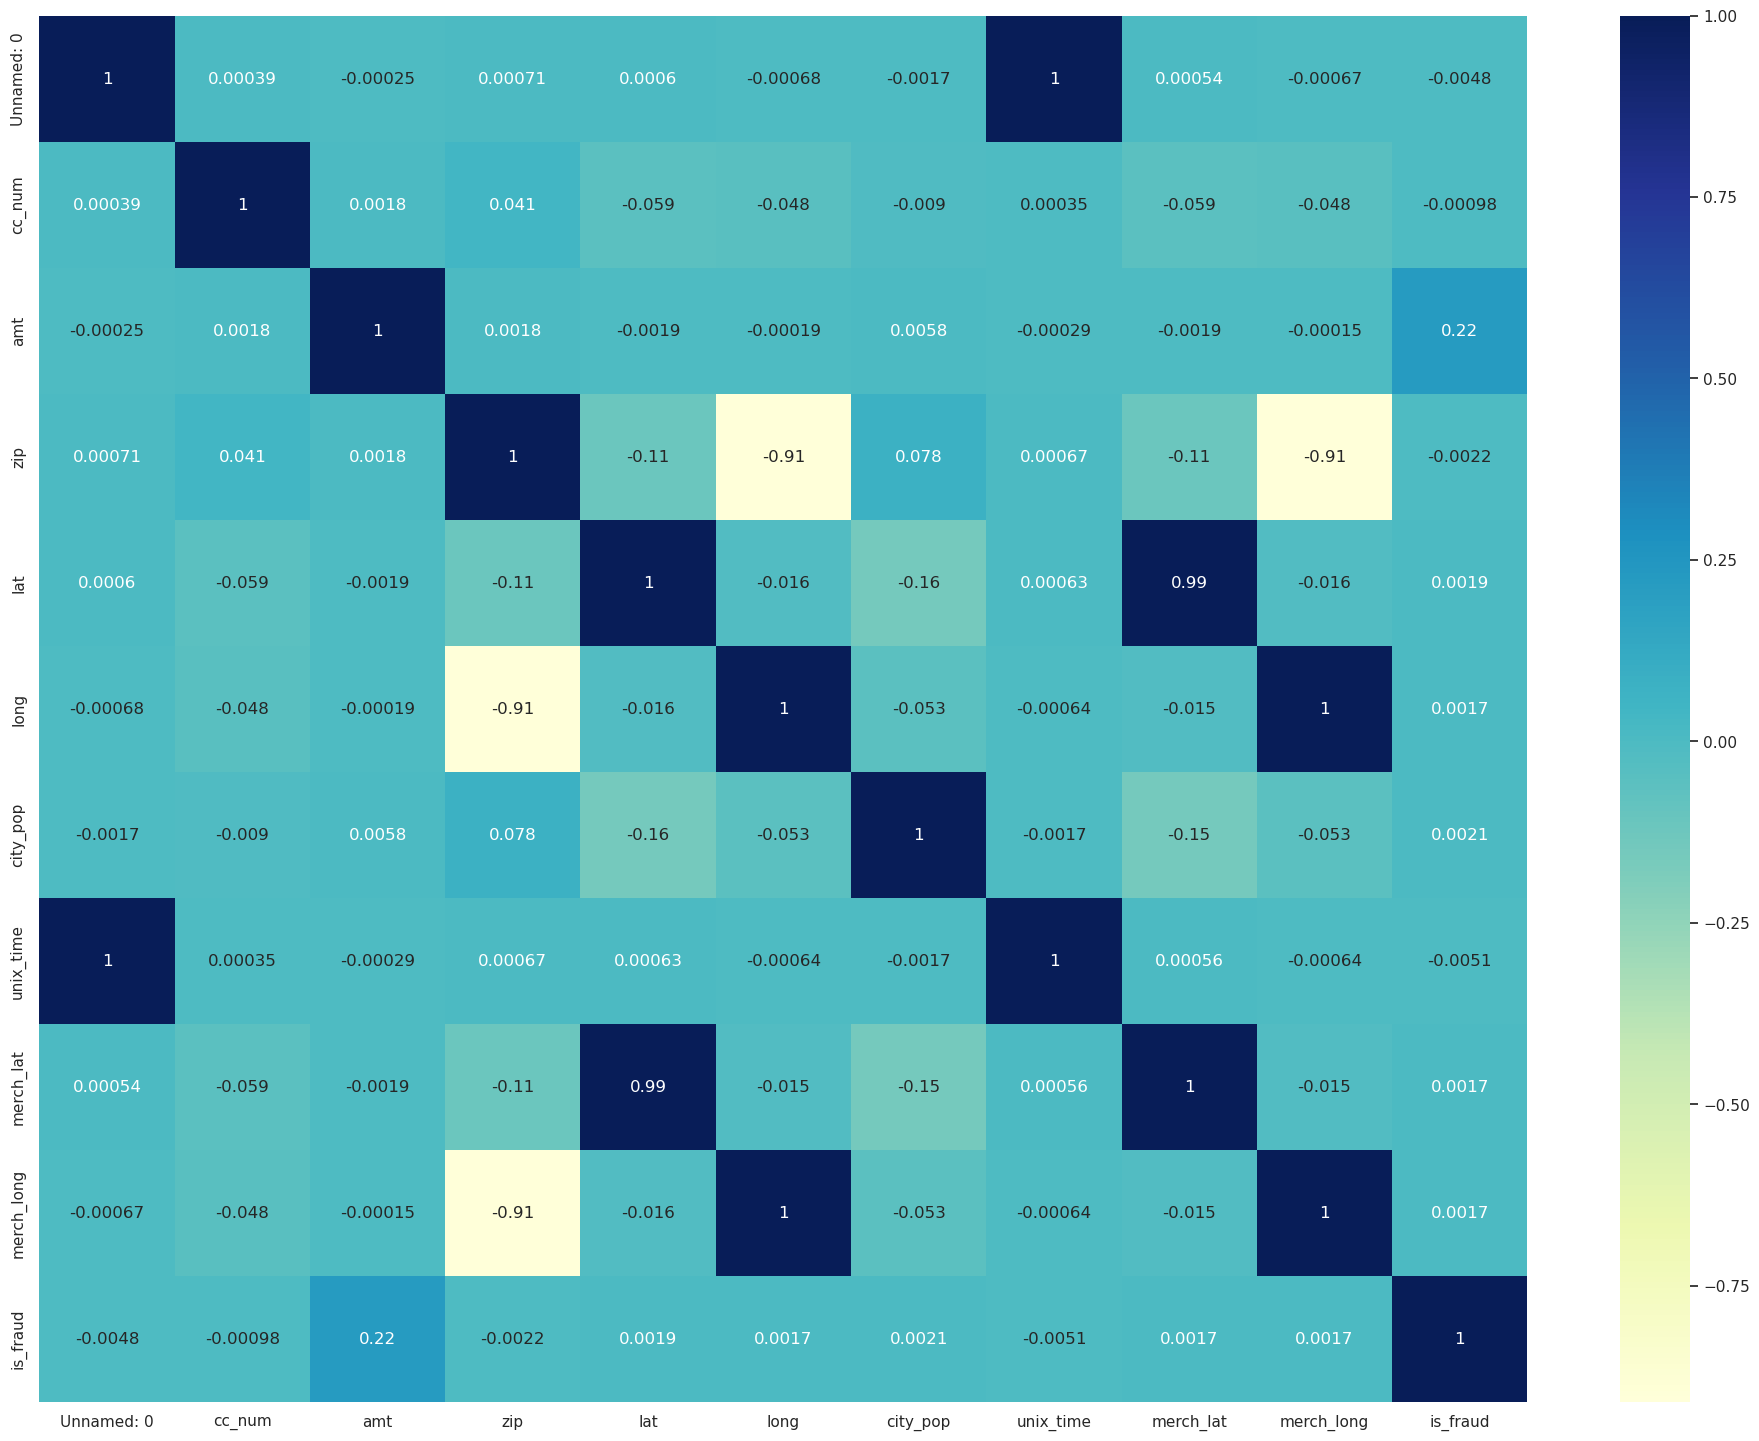

In [138]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [139]:
frames = [df_train, df_test]
df1 = pd.concat(frames)
    
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0


In [140]:
df1 = df1.drop(df1.columns[0], axis=1)

df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0


In [141]:
df1.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000
mean,417386038393710400.0000,70.0636,48813.2582,38.5393,-90.2278,88643.6745,1358674218.8344,38.5390,-90.2279,0.0052
std,1309115265318734848.0000,159.2540,26881.8460,5.0715,13.7479,301487.6183,18195081.3876,5.1056,13.7597,0.0720
min,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0274,-166.6716,0.0000
25%,180042946491150.0000,9.6400,26237.0000,34.6689,-96.7980,741.0000,1343016823.7500,34.7401,-96.8994,0.0000
50%,3521417320836166.0000,47.4500,48174.0000,39.3543,-87.4769,2443.0000,1357089331.0000,39.3689,-87.4407,0.0000
75%,4642255475285942.0000,83.1000,72042.0000,41.9404,-80.1580,20328.0000,1374581485.2500,41.9563,-80.2451,0.0000
max,4992346398065154048.0000,28948.9000,99921.0000,66.6933,-67.9503,2906700.0000,1388534374.0000,67.5103,-66.9509,1.0000


In [142]:
df1.dtypes

trans_date_trans_time    object 
cc_num                   int64  
merchant                 object 
category                 object 
amt                      float64
first                    object 
last                     object 
gender                   object 
street                   object 
city                     object 
state                    object 
zip                      int64  
lat                      float64
long                     float64
city_pop                 int64  
job                      object 
dob                      object 
trans_num                object 
unix_time                int64  
merch_lat                float64
merch_long               float64
is_fraud                 int64  
dtype: object

In [143]:
#  Converting data type of trans_date_trans_time to datetime

df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])

In [144]:
df1.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [145]:
##### Derive 'Transaction Hour' Feature from 'Transaction Time' Feature

df1['trans_hour'] = df1['trans_date_trans_time'].dt.hour
df1['trans_hour']

0         0 
1         0 
2         0 
3         0 
4         0 
         .. 
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [146]:
##### Derive 'Day of Week' Feature from 'Transaction Time' Feature

df1['day_of_week'] = df1['trans_date_trans_time'].dt.day_name()
df1['day_of_week']

0         Tuesday 
1         Tuesday 
2         Tuesday 
3         Tuesday 
4         Tuesday 
           ...    
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [147]:
##### Derive 'Year Month' Feature from 'Transaction Time' Feature
df1['year_month'] = df1['trans_date_trans_time'].dt.to_period('M')
df1['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

In [148]:
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,0,Tuesday,2019-01


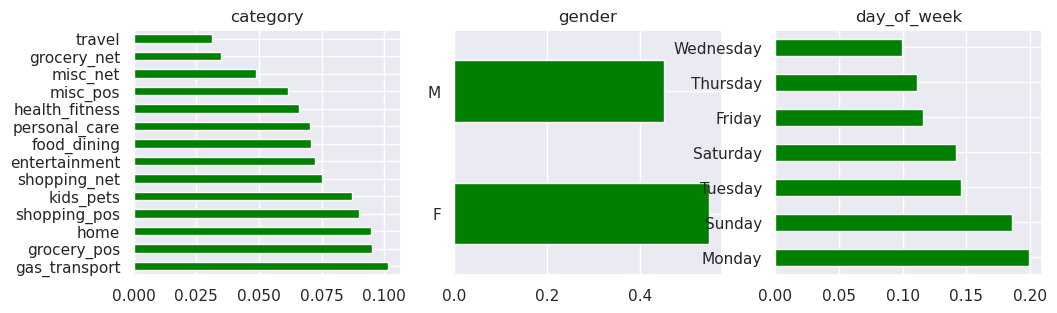

In [149]:
#Cost-Benefit analysis

cat_cols=['category','gender','day_of_week']
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    df1[col].value_counts(normalize=True).plot.barh(color='green')
    plt.title(col)
plt.show()

In [150]:
df1.job.value_counts(normalize=True,ascending=False)

Film/video editor            0.0075
Exhibition designer          0.0071
Surveyor, land/geomatics     0.0067
Naval architect              0.0067
Materials engineer           0.0063
                              ...  
Veterinary surgeon           0.0000
Engineer, water              0.0000
Contracting civil engineer   0.0000
Ship broker                  0.0000
Warehouse manager            0.0000
Name: job, Length: 497, dtype: float64

In [151]:
#Age of customer

df1['dob'] = pd.to_datetime(df1['dob'])

df1['age'] = np.round((df1['trans_date_trans_time'] - df1['dob'])/np.timedelta64(1,'Y'))
df1['age']

0        31.0000
1        41.0000
2        57.0000
3        52.0000
4        33.0000
           ...  
555714   55.0000
555715   21.0000
555716   39.0000
555717   55.0000
555718   28.0000
Name: age, Length: 1852394, dtype: float64

In [152]:
df1['age'].describe()

count   1852394.0000
mean    46.2662     
std     17.4124     
min     14.0000     
25%     33.0000     
50%     44.0000     
75%     57.0000     
max     96.0000     
Name: age, dtype: float64

In [153]:
# Amt distribution

pd.concat(
[df1['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df1.loc[df1['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df1.loc[df1['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.0000,1842743.0000,9651.0000
1,mean,70.0636,67.6513,530.6614
2,std,159.2540,153.5481,391.0289
3,min,1.0000,1.0000,1.0600
4,50%,47.4500,47.2400,390.0000
5,95%,195.3400,189.5900,1084.0900
6,99.9%,1517.2411,1519.6226,1293.1270
7,max,28948.9000,28948.9000,1376.0400


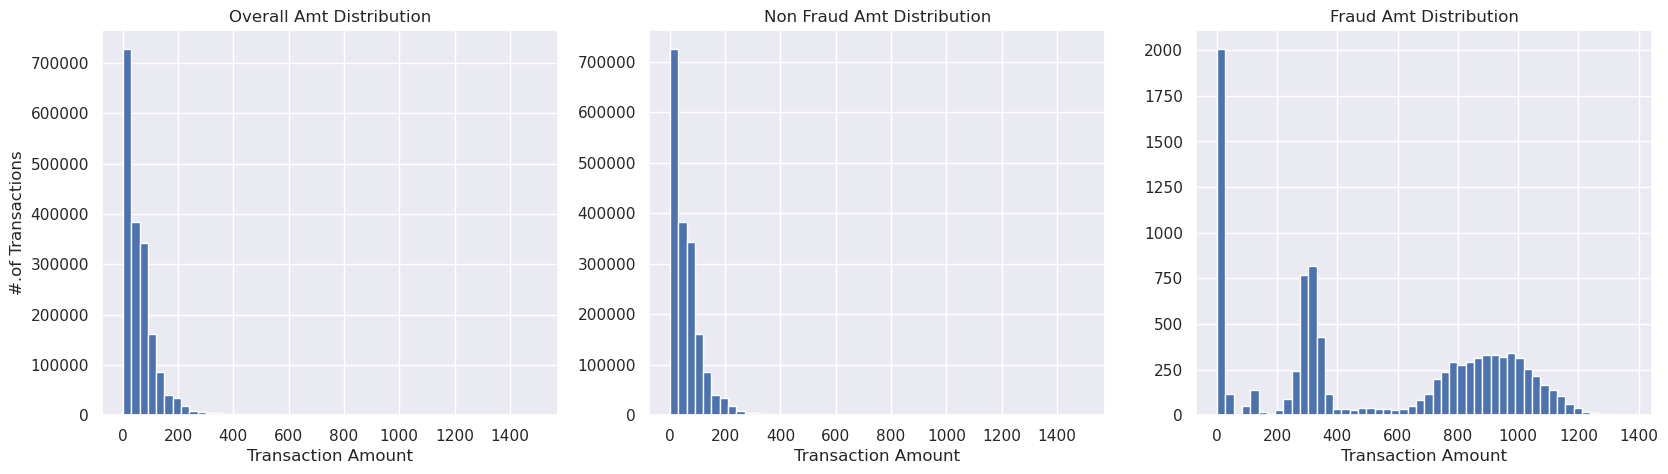

In [154]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df1[df1['amt']<=1500]['amt'], bins=50)
ax[1].hist(df1[(df1['is_fraud']==0) & (df1['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df1[(df1['is_fraud']==1) & (df1['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

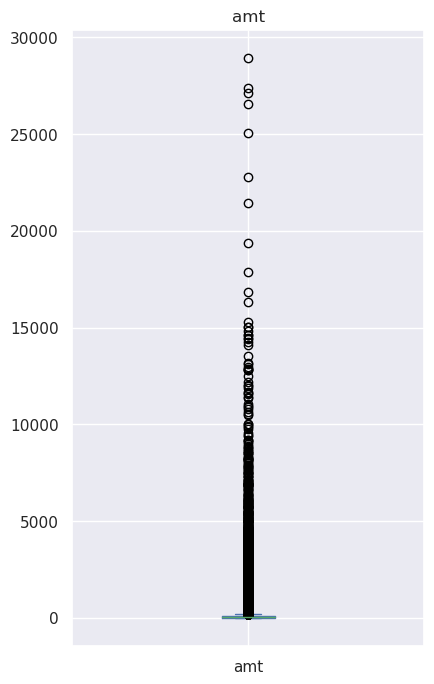

In [155]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df1[col].plot.box()
    plt.title(col)
plt.show()

# Timeline

In [156]:
df1_timeline01 = df1.groupby(df1['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df1_timeline01.columns = ['year_month','num_of_transactions','customers']
df1_timeline01.head()

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910


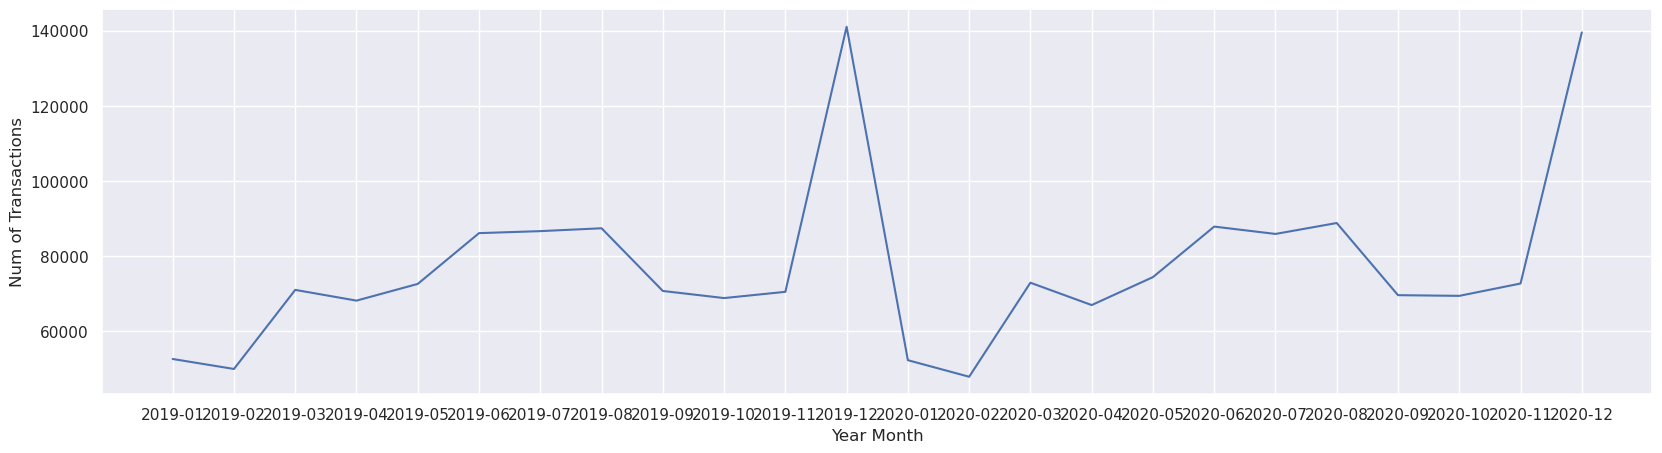

In [157]:


x = np.arange(0,len(df1_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

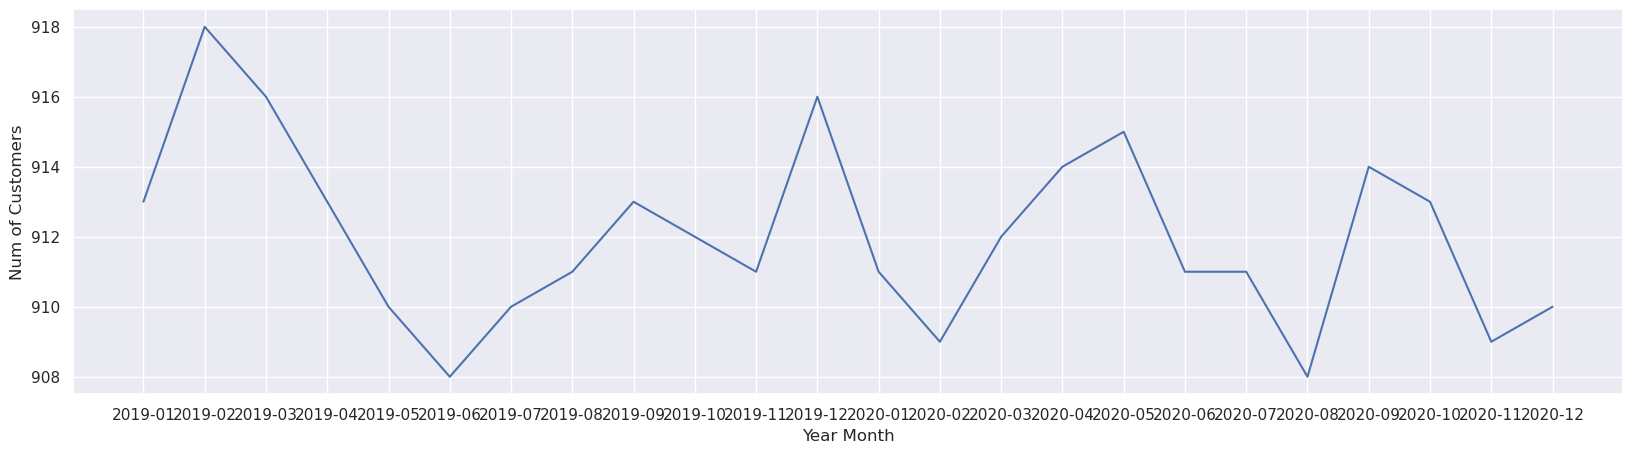

In [158]:
#### Year Month vs Number of Customers Done the Transactions

x = np.arange(0,len(df1_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [159]:
# Fraud transaction

df_fraud_transactions = df1[df1['is_fraud']==1]

df1_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df1_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df1_timeline02.head()

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42


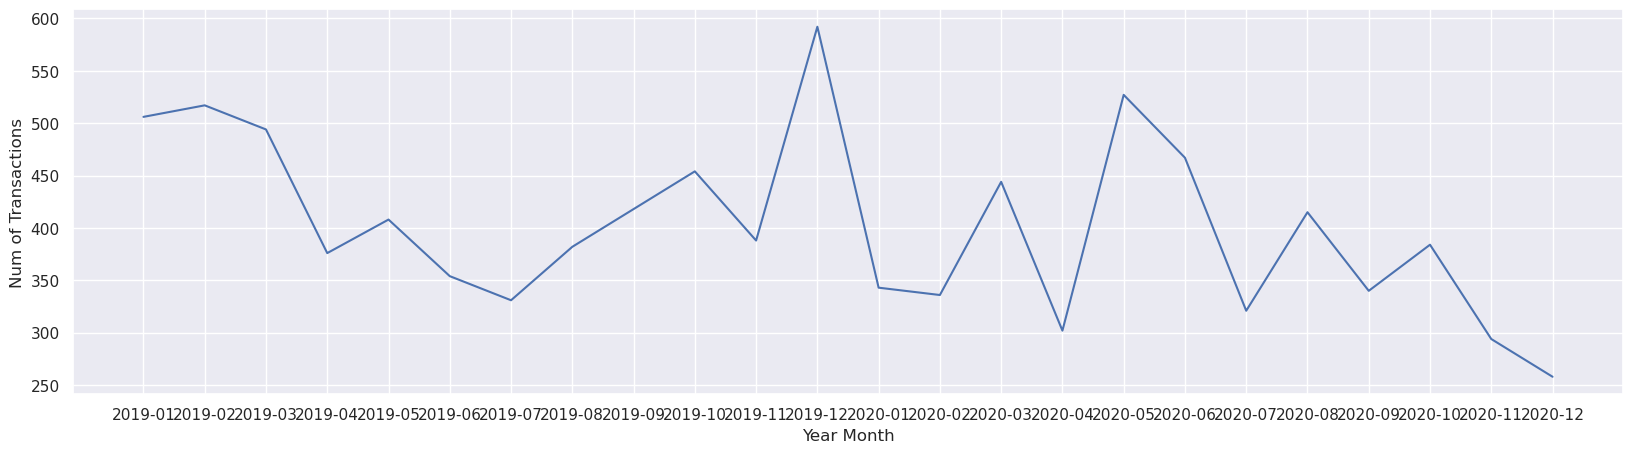

In [160]:
x = np.arange(0,len(df1_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

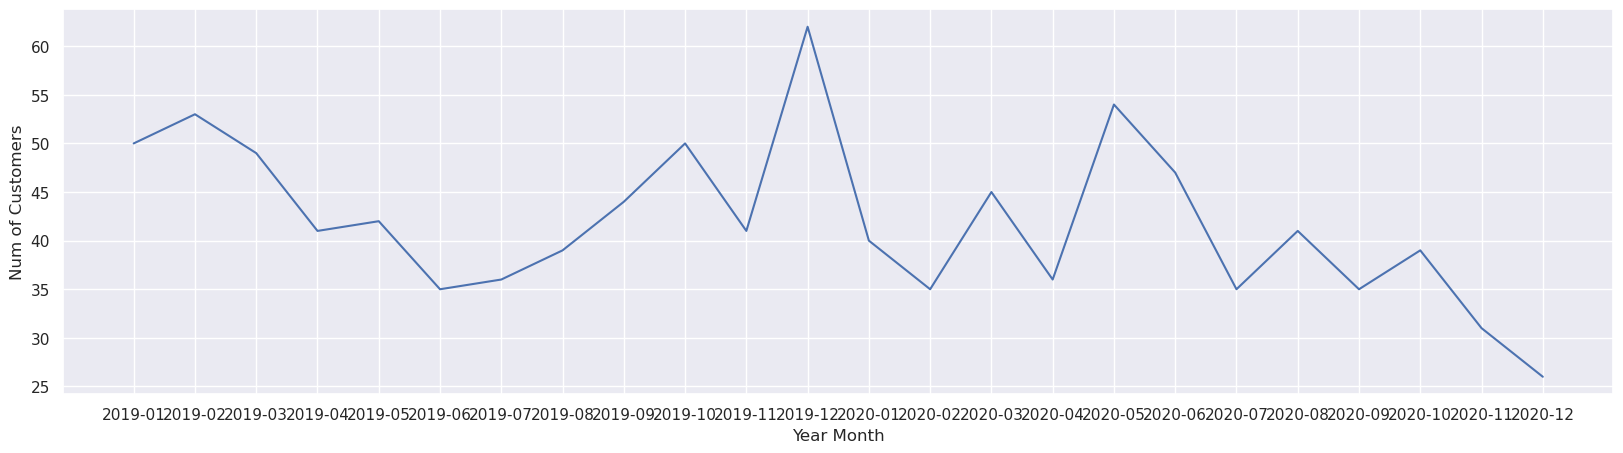

In [161]:
x = np.arange(0,len(df1_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df1_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df1_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

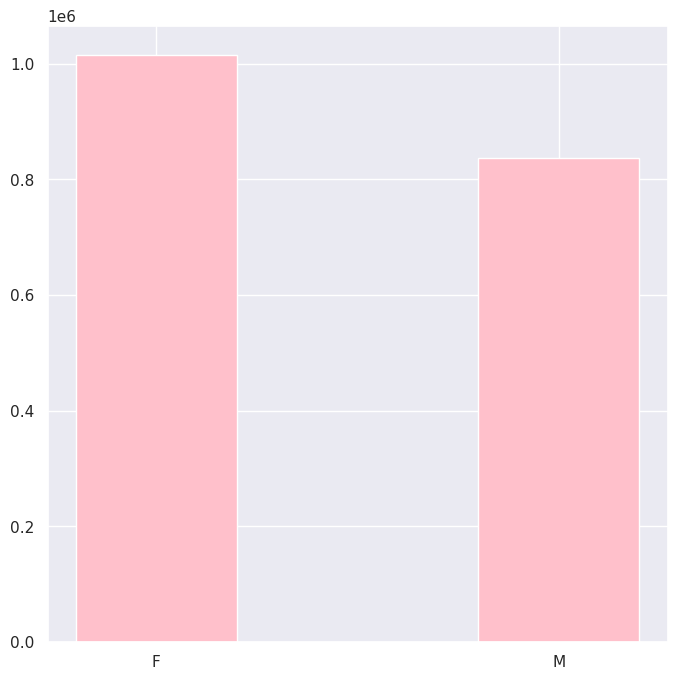

In [162]:
# Gender

df_gender = df1[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

plt.bar(df_gender['Gender'], df_gender['gender_count'], color ='pink',  
        width = 0.4)

plt.show()

In [163]:
df_fraud_gender = df1[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.5172
1,F,1,4899,1014749,0.4828
2,M,0,832893,837645,99.4327
3,M,1,4752,837645,0.5673


In [164]:
# Category

df_category = df1[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.1506
4,grocery_pos,176191,9.5115
6,home,175460,9.4721
12,shopping_pos,166463,8.9864
7,kids_pets,161727,8.7307
11,shopping_net,139322,7.5212
0,entertainment,134118,7.2403
1,food_dining,130729,7.0573
10,personal_care,130085,7.0225
5,health_fitness,122553,6.6159


In [165]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.1506
1,4,grocery_pos,176191,9.5115
2,6,home,175460,9.4721
3,12,shopping_pos,166463,8.9864
4,7,kids_pets,161727,8.7307
5,11,shopping_net,139322,7.5212
6,0,entertainment,134118,7.2403
7,1,food_dining,130729,7.0573
8,10,personal_care,130085,7.0225
9,5,health_fitness,122553,6.6159


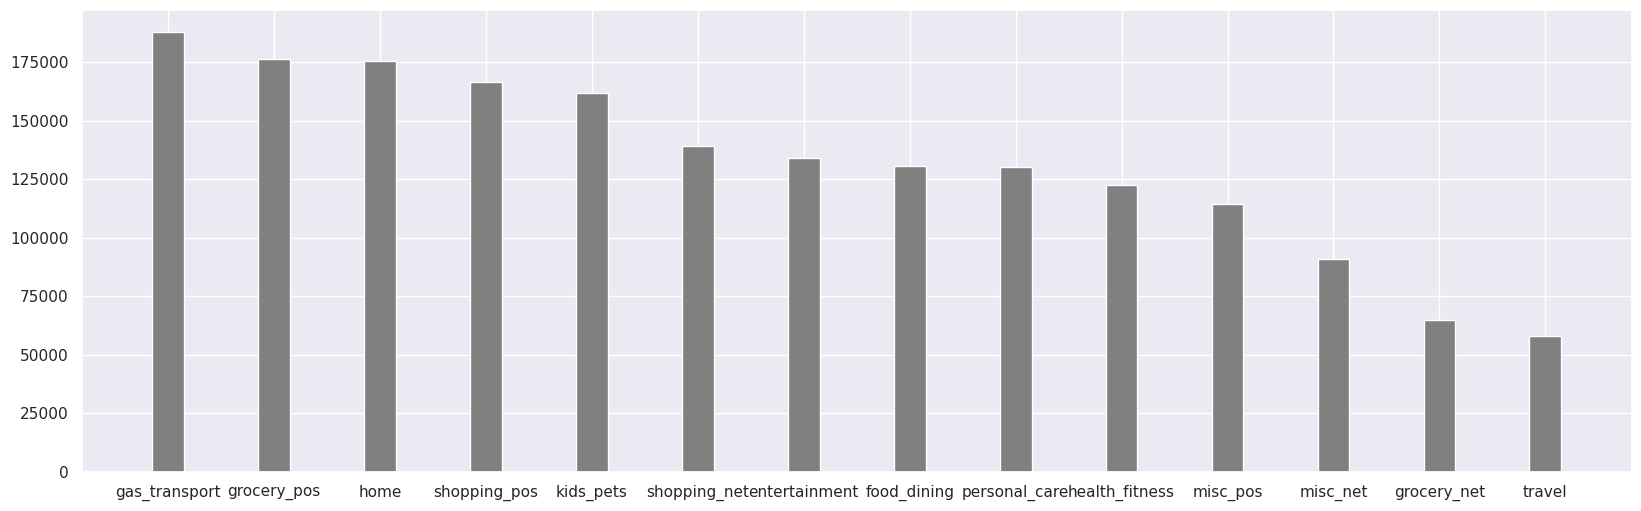

In [166]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color ='grey',  
        width = 0.3)

plt.show()

In [167]:
df_fraud_category = df1[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.1506,99.5894
5,gas_transport,1,772,188029,10.1506,0.4106
8,grocery_pos,0,173963,176191,9.5115,98.7355
9,grocery_pos,1,2228,176191,9.5115,1.2645
13,home,1,265,175460,9.4721,0.1510
12,home,0,175195,175460,9.4721,99.8490
25,shopping_pos,1,1056,166463,8.9864,0.6344
24,shopping_pos,0,165407,166463,8.9864,99.3656
14,kids_pets,0,161423,161727,8.7307,99.8120
15,kids_pets,1,304,161727,8.7307,0.1880


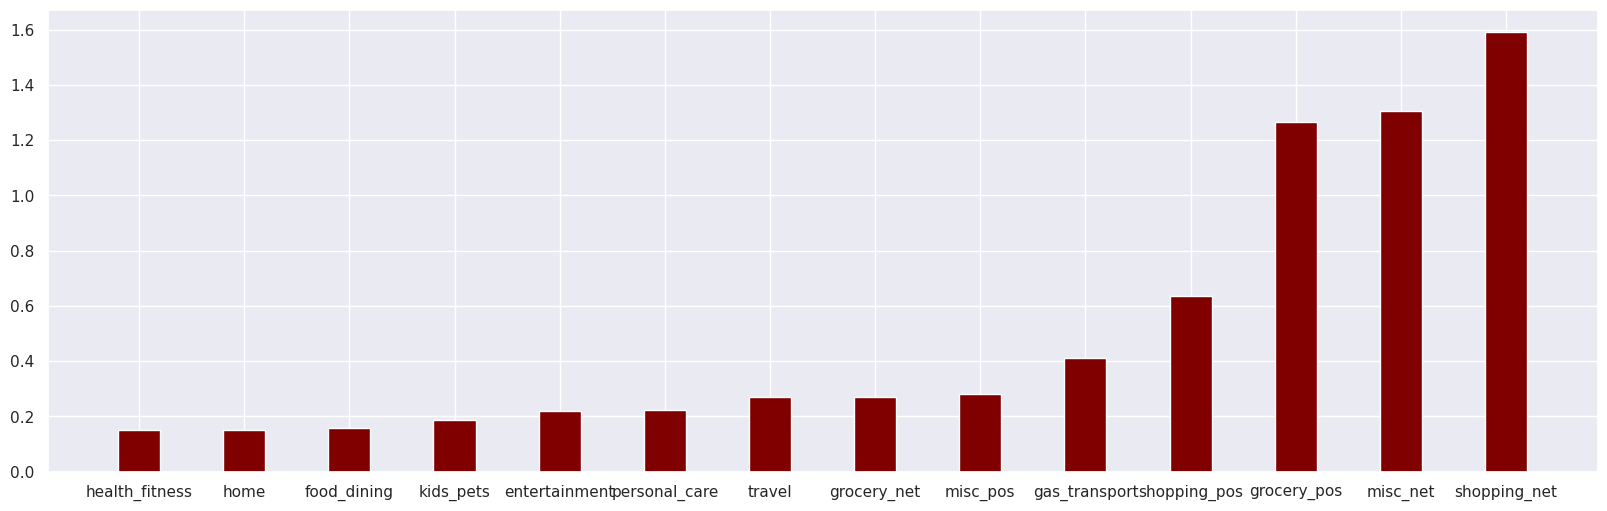

In [168]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])

fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color ='maroon',  
        width = 0.4)

plt.show()

In [169]:
# Merchant

df_merchant = df1[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.3380
105,fraud_Cormier LLC,5246,0.2832
571,fraud_Schumm PLC,5195,0.2804
349,fraud_Kuhn LLC,5031,0.2716
70,fraud_Boyer PLC,4999,0.2699
...,...,...,...
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.0594
633,fraud_Treutel-King,1098,0.0593
544,fraud_Satterfield-Lowe,1095,0.0591
221,"fraud_Hahn, Douglas and Schowalter",1091,0.0589


In [170]:
df_fraud_merchant = df1[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.1489,2.1755
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.1010,2.0321
1226,fraud_Terry-Huel,1,56,2864,0.1546,1.9553
607,fraud_Kerluke-Abshire,1,50,2635,0.1422,1.8975
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.1523,1.8788
...,...,...,...,...,...,...
775,"fraud_Lesch, D'Amore and Brown",1,1,2659,0.1435,0.0376
1089,"fraud_Schaefer, Fay and Hilll",1,1,2664,0.1438,0.0375
950,"fraud_Parker, Nolan and Trantow",1,1,2795,0.1509,0.0358
1335,fraud_Windler LLC,1,1,3170,0.1711,0.0315


In [171]:
# Covnerting categorical variables

category_onehot = pd.get_dummies(df1.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df1.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df1.day_of_week, prefix='week',drop_first=True)

In [172]:
df2 = pd.concat([df1, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,0,Tuesday,2019-01,31.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,0,Tuesday,2019-01,41.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,0,Tuesday,2019-01,57.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,0,Tuesday,2019-01,52.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,0,Tuesday,2019-01,33.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [173]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

df2['dist'] = \
    haversine(df2['lat'], df2['long'],
                 df2['merch_lat'], df2['merch_long'])

df2['dist'].describe()

count   1852394.0000
mean    76.1117     
std     29.1170     
min     0.0223      
25%     55.3201     
50%     78.2164     
75%     98.5095     
max     152.1172    
Name: dist, dtype: float64

In [174]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','is_fraud']

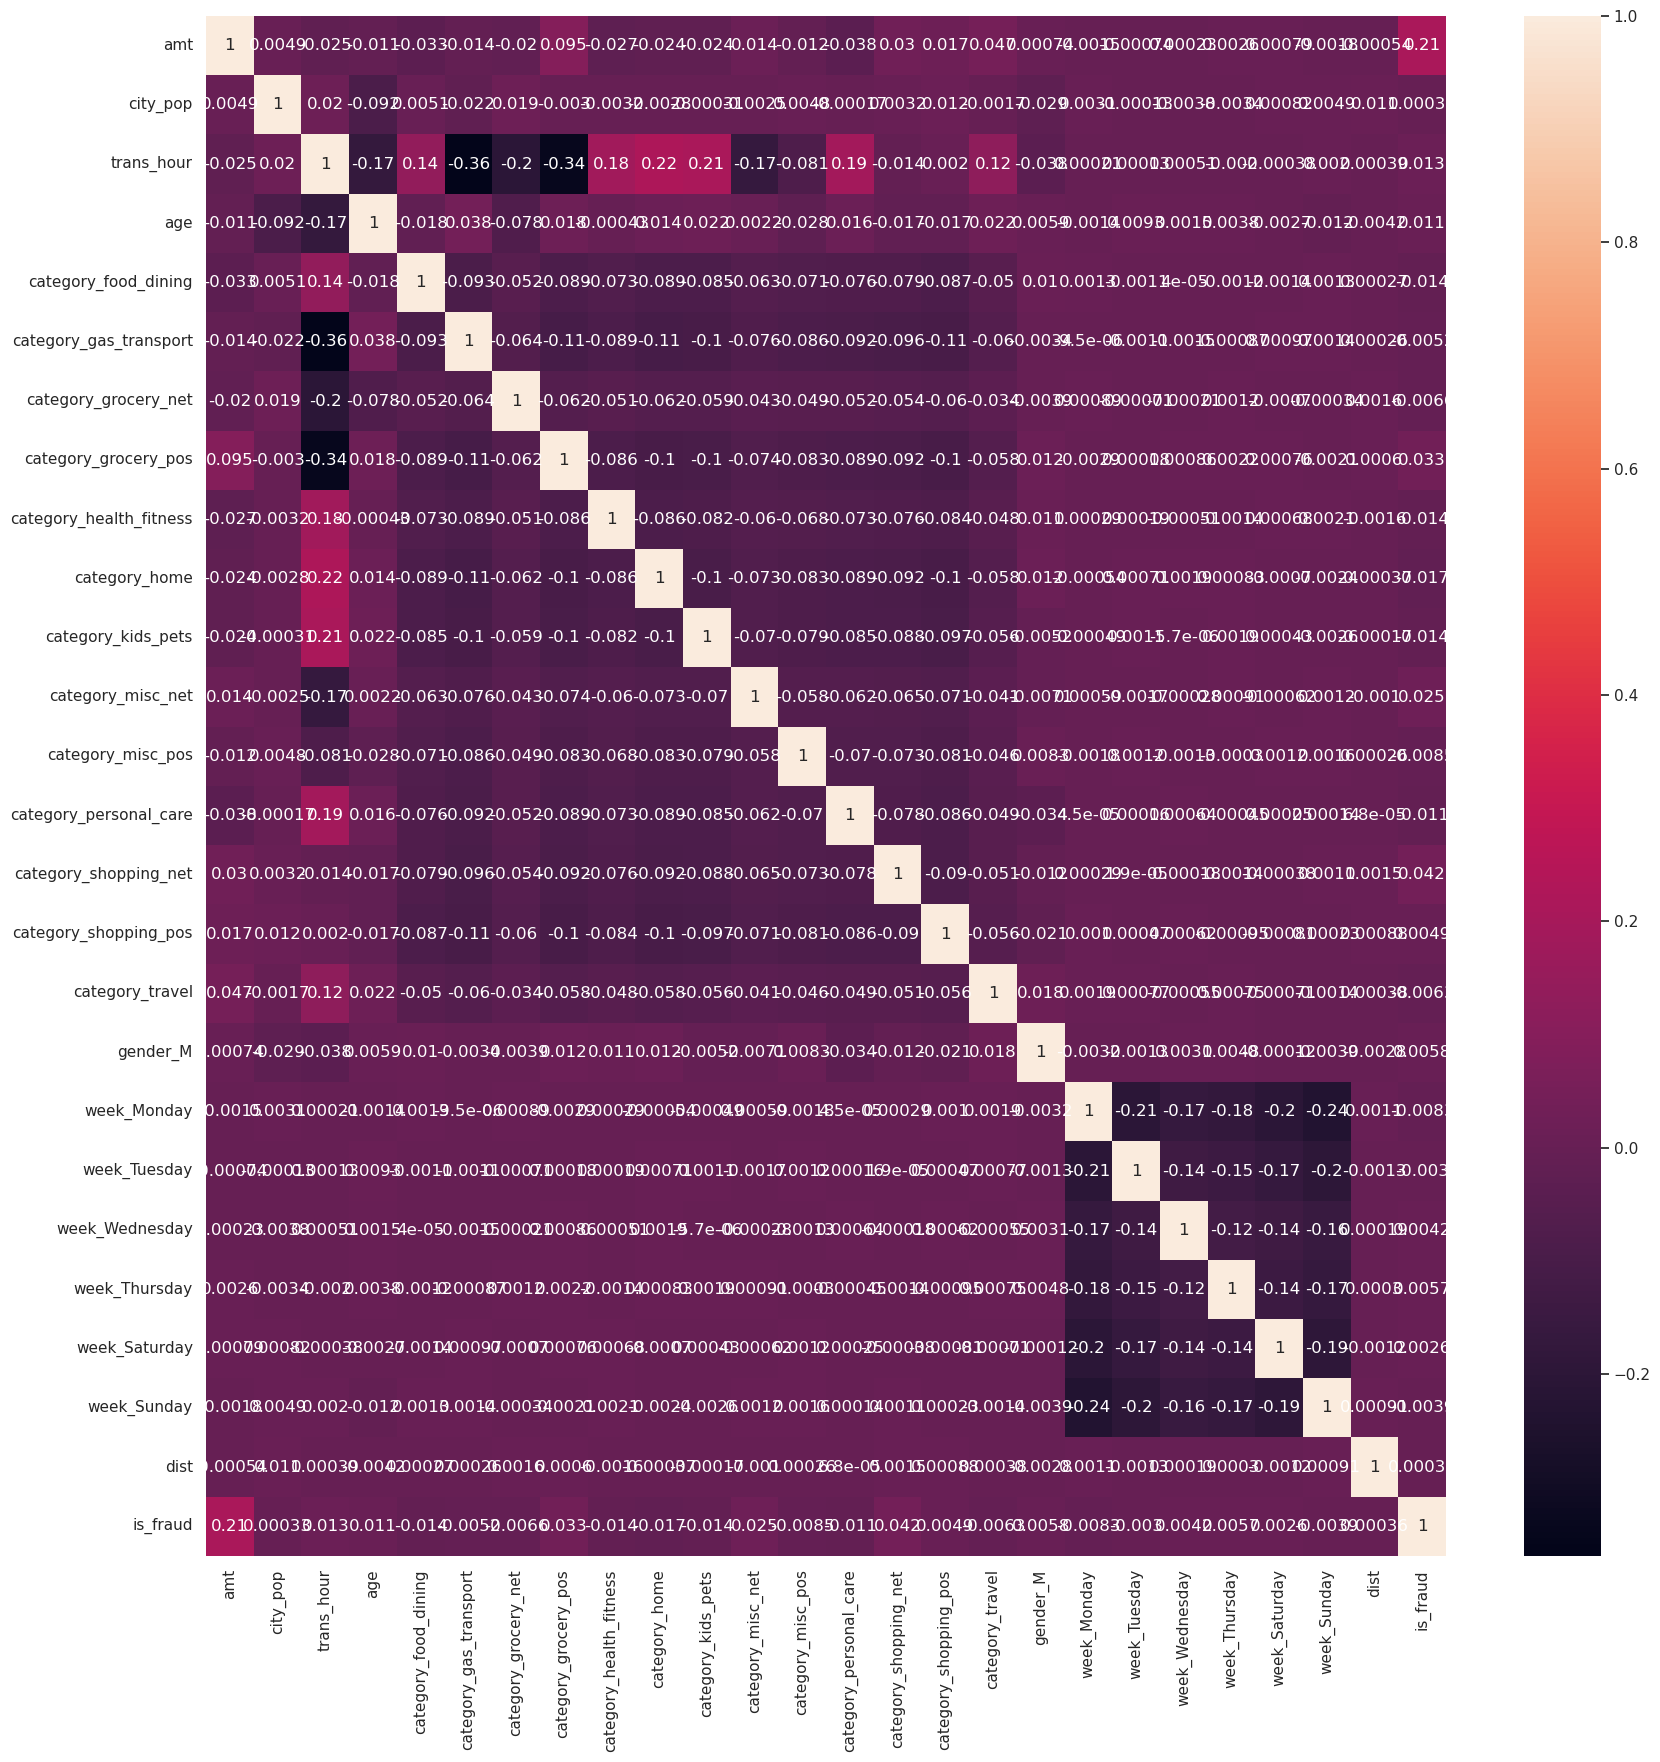

In [175]:
corr = df2[cols].corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [176]:
df_fraud_merchant = df1[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [177]:
df_job = df1[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

,Job,tran_count_by_job,percent
194,Film/video editor,13898,0.7503
188,Exhibition designer,13167,0.7108
442,"Surveyor, land/geomatics",12436,0.6713
309,Naval architect,12434,0.6712
287,Materials engineer,11711,0.6322
...,...,...,...
175,"Engineer, water",8,0.0004
485,Veterinary surgeon,8,0.0004
490,Warehouse manager,7,0.0004
423,Ship broker,7,0.0004


In [178]:
df_fraud_job = df1[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [179]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp
378,Film/video editor,1,52,13898,0.7503,0.3742
377,Film/video editor,0,13846,13898,0.7503,99.6258
366,Exhibition designer,1,51,13167,0.7108,0.3873
365,Exhibition designer,0,13116,13167,0.7108,99.6127
861,"Surveyor, land/geomatics",0,12386,12436,0.6713,99.5979
862,"Surveyor, land/geomatics",1,50,12436,0.6713,0.4021
603,Naval architect,1,66,12434,0.6712,0.5308
602,Naval architect,0,12368,12434,0.6712,99.4692
559,Materials engineer,1,62,11711,0.6322,0.5294
558,Materials engineer,0,11649,11711,0.6322,99.4706


In [180]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.7503,0.3742,Fraud
377,Film/video editor,0,13846,13898,0.7503,99.6258,Not Fraud
366,Exhibition designer,1,51,13167,0.7108,0.3873,Fraud
365,Exhibition designer,0,13116,13167,0.7108,99.6127,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.6713,99.5979,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.6713,0.4021,Fraud
603,Naval architect,1,66,12434,0.6712,0.5308,Fraud
602,Naval architect,0,12368,12434,0.6712,99.4692,Not Fraud
559,Materials engineer,1,62,11711,0.6322,0.5294,Fraud
558,Materials engineer,0,11649,11711,0.6322,99.4706,Not Fraud


In [181]:
## Test Train split

In [182]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist']

Y_cols = ['is_fraud']

In [183]:
df2_initial_train = df2.loc[(df2['trans_date_trans_time'] >= '2019-03-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-06-30 23:23:00')][cols]

In [184]:
cnt_non_fraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 0]['amt'].count()
df2_class_fraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 1]
df2_class_nonfraud_initial = df2_initial_train[df2_initial_train['is_fraud'] == 0]

In [185]:
df2_class_fraud_oversample_initial = df2_class_fraud_initial.sample(cnt_non_fraud_initial, replace=True)
df2_oversampled_initial = pd.concat([df2_class_nonfraud_initial, df2_class_fraud_oversample_initial], axis=0)

print('Random over-sampling:')
print(df2_oversampled_initial['is_fraud'].value_counts())

Random over-sampling:
0    1217587
1    1217587
Name: is_fraud, dtype: int64


In [186]:
df2_oversampled_initial[X_cols].head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,dist
102391,59.5600,965,0,37.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,85.6039
102392,81.2100,24536,0,35.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.6767
102393,196.0400,4056,0,29.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113.7408
102394,86.0500,760,0,33.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118.7359
102395,60.9300,5512,0,39.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,127.3146


In [187]:
X_train_initial = \
df2_oversampled_initial[X_cols]

y_train_initial = \
df2_oversampled_initial[Y_cols]

In [188]:
X_test_initial = df2[(df2['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-08-30 23:23:00')][X_cols]

y_test_initial = df2[(df2['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df2['trans_date_trans_time'] <= '2020-08-30 23:23:00')][Y_cols]

In [189]:
#Logistic Regression

logreg = LogisticRegression(random_state=42)

In [190]:
logreg.fit(X_train_initial, y_train_initial)

LogisticRegression(random_state=42)

In [191]:
y_train_pred_initial = logreg.predict(X_train_initial)
y_test_pred_initial = logreg.predict(X_test_initial)

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Train
print(confusion_matrix(y_train_initial, y_train_pred_initial))
print(classification_report(y_train_initial, y_train_pred_initial))

[[1141930   75657]
 [ 293233  924354]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86   1217587
           1       0.92      0.76      0.83   1217587

    accuracy                           0.85   2435174
   macro avg       0.86      0.85      0.85   2435174
weighted avg       0.86      0.85      0.85   2435174



In [193]:
#Test

print(confusion_matrix(y_test_initial, y_test_pred_initial))
print(classification_report(y_test_initial, y_test_pred_initial))

[[1172094   77179]
 [   1558    4920]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1249273
           1       0.06      0.76      0.11      6478

    accuracy                           0.94   1255751
   macro avg       0.53      0.85      0.54   1255751
weighted avg       0.99      0.94      0.96   1255751



In [194]:
# Decision Tree

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_initial, y_train_initial)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [195]:
# Train

print("Train Results")
pred_train_initial = dt_clf.predict(X_train_initial)

print(confusion_matrix(y_train_initial, pred_train_initial))
print(classification_report(y_train_initial, pred_train_initial))

Train Results
[[1210636    6951]
 [      0 1217587]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1217587
           1       0.99      1.00      1.00   1217587

    accuracy                           1.00   2435174
   macro avg       1.00      1.00      1.00   2435174
weighted avg       1.00      1.00      1.00   2435174



In [196]:
# Test

print("Test Results")
pred_test_initial = dt_clf.predict(X_test_initial)

print(confusion_matrix(y_test_initial, pred_test_initial))
print(classification_report(y_test_initial, pred_test_initial))

Test Results
[[1242119    7154]
 [     93    6385]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1249273
           1       0.47      0.99      0.64      6478

    accuracy                           0.99   1255751
   macro avg       0.74      0.99      0.82   1255751
weighted avg       1.00      0.99      1.00   1255751



In [197]:
# Random Forest

rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [198]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train_initial, y_train_initial)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [199]:
print("Train Results")
pred_train_initial = rf_clf.predict(X_train_initial)

print(confusion_matrix(y_train_initial, pred_train_initial))
print(classification_report(y_train_initial, pred_train_initial))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.0s finished


[[1215459    2128]
 [      0 1217587]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217587
           1       1.00      1.00      1.00   1217587

    accuracy                           1.00   2435174
   macro avg       1.00      1.00      1.00   2435174
weighted avg       1.00      1.00      1.00   2435174



In [200]:
print("Test Results")
pred_test_initial = rf_clf.predict(X_test_initial)

print(confusion_matrix(y_test_initial, pred_test_initial))
print(classification_report(y_test_initial, pred_test_initial))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.9s finished


[[1247028    2245]
 [    111    6367]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1249273
           1       0.74      0.98      0.84      6478

    accuracy                           1.00   1255751
   macro avg       0.87      0.99      0.92   1255751
weighted avg       1.00      1.00      1.00   1255751



In [201]:
# Hisorical Variables

In [202]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,0,Tuesday,2019-01,31.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.5976
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,0,Tuesday,2019-01,41.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.2122
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,0,Tuesday,2019-01,57.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.2061
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,0,Tuesday,2019-01,52.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.6732
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,0,Tuesday,2019-01,33.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.5567


In [203]:
df2['val_for_agg'] = 1

In [204]:
# Last 60 days

df_hist_trans_60d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [205]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [206]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0000
1,60416207185,2019-01-02,1.0000
2,60416207185,2019-01-03,5.0000
3,60416207185,2019-01-04,7.0000
4,60416207185,2019-01-05,9.0000


In [207]:
# Last 24 hrs

df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0000
1,60416207185,2019-01-02 08:44:57,1.0000
2,60416207185,2019-01-02 08:47:36,2.0000
3,60416207185,2019-01-02 12:38:14,3.0000
4,60416207185,2019-01-02 13:10:46,4.0000


In [208]:
# 24 hrs fraud

df_hist_fraud_trans_24h = \
    df2[df2['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0000
1,60416207185,2019-03-01 02:42:25,1.0000
2,60416207185,2019-03-01 23:06:58,2.0000
3,60416207185,2019-03-02 22:10:38,3.0000
4,60416207185,2019-03-02 22:10:59,2.0000


In [209]:
# 2 hr fraud

df_hist_fraud_trans_2h = \
    df2[df2['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0000
1,60416207185,2019-03-01 02:42:25,1.0000
2,60416207185,2019-03-01 23:06:58,2.0000
3,60416207185,2019-03-02 22:10:38,1.0000
4,60416207185,2019-03-02 22:10:59,1.0000


In [210]:
# 60day average

df_hist_trans_amt_avg_60d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [211]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

df_hist_trans_amt_avg_60d.head()

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.0000
1,60416207185,2019-01-02,7.2700
2,60416207185,2019-01-03,35.1883
3,60416207185,2019-01-04,31.3657
4,60416207185,2019-01-05,40.3789


In [212]:
#### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [213]:
df2['trans_date'] = df2['trans_date_trans_time'].dt.date

df3 = df2.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [214]:
df3 = df3.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df3 = df3.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [215]:
df3[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df3[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

df3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,0,Tuesday,2019-01,31.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.5976,1,2019-01-01,1.0000,6.0000,0.0000,0.0000,4.9700
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,0,Tuesday,2019-01,41.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.2122,1,2019-01-01,1.0000,1.0000,0.0000,0.0000,47.4884
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,0,Tuesday,2019-01,57.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.2061,1,2019-01-01,8.0000,5.0000,0.0000,0.0000,377.9250
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.0000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.0343,-112.5611,0,0,Tuesday,2019-01,52.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.6732,1,2019-01-01,1.0000,5.0000,0.0000,0.0000,45.0000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.9600,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.6750,-78.6325,0,0,Tuesday,2019-01,33.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.5567,1,2019-01-01,1.0000,6.0000,0.0000,0.0000,41.9600


In [216]:
df3['hist_fraud_trans_24h'] = df3['hist_fraud_trans_24h'] - df3['hist_fraud_trans_2h']

In [217]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

corr = df3[cols].corr()

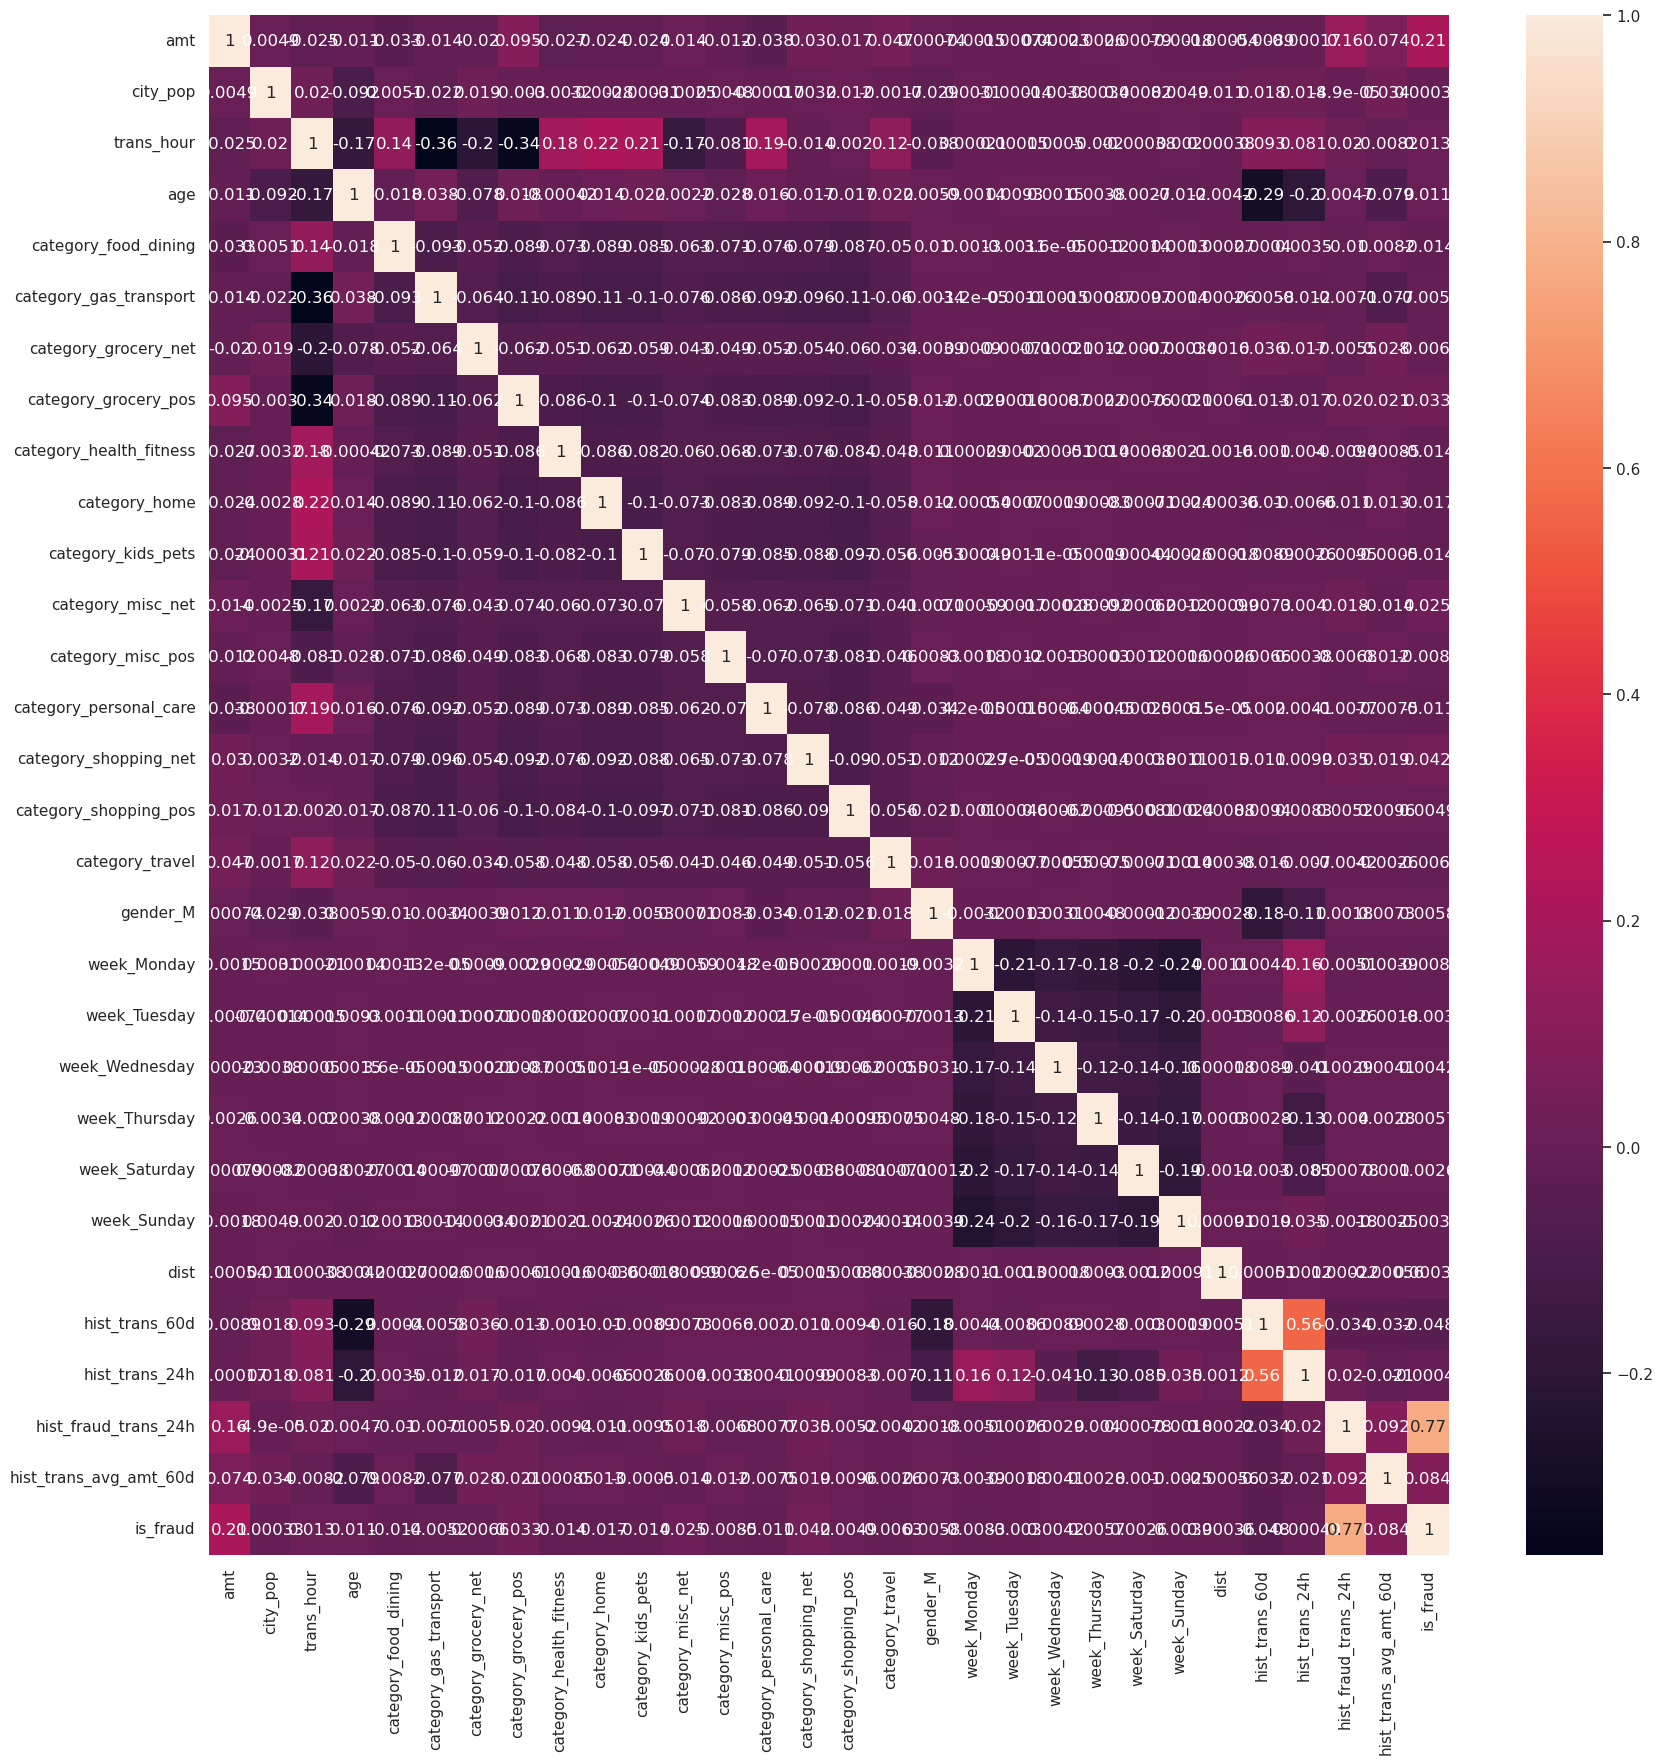

In [218]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [219]:
# Test Train Split

In [220]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] 

Y_cols = ['is_fraud']

In [221]:
df3_train = df3.loc[(df3['trans_date_trans_time'] >= '2019-03-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-06-30 23:23:00')][cols]

In [222]:
#Oversampling

cnt_non_fraud = df3_train[df3_train['is_fraud'] == 0]['amt'].count()
df3_class_fraud = df3_train[df3_train['is_fraud'] == 1]
df3_class_nonfraud = df3_train[df3_train['is_fraud'] == 0]

In [223]:
df3_class_fraud_oversample = df3_class_fraud.sample(cnt_non_fraud, replace=True)
df3_oversampled = pd.concat([df3_class_nonfraud, df3_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df3_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1217627
1    1217627
Name: is_fraud, dtype: int64


In [224]:
df3.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                     int64         
merchant                   object        
category                   object        
amt                        float64       
first                      object        
last                       object        
gender                     object        
street                     object        
city                       object        
state                      object        
zip                        int64         
lat                        float64       
long                       float64       
city_pop                   int64         
job                        object        
dob                        datetime64[ns]
trans_num                  object        
unix_time                  int64         
merch_lat                  float64       
merch_long                 float64       
is_fraud                   int64         
trans_hour                 int64         
day_of_week                object 

In [225]:
df3_oversampled[X_cols].head()

,amt,city_pop,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,dist,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d
102393,59.5600,965,0,37.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,85.6039,82.0000,4.0000,0.0000,95.9511
102394,81.2100,24536,0,35.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.6767,138.0000,2.0000,0.0000,88.1725
102395,196.0400,4056,0,29.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113.7408,216.0000,5.0000,0.0000,93.6975
102396,86.0500,760,0,33.0000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118.7359,146.0000,3.0000,0.0000,49.7392
102397,60.9300,5512,0,39.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,127.3146,230.0000,10.0000,0.0000,61.6577


In [226]:
X_train = \
df3_oversampled[X_cols]

y_train = \
df3_oversampled[Y_cols]

In [227]:
X_test = df3[(df3['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-08-30 23:23:00')][X_cols]

y_test = df3[(df3['trans_date_trans_time'] >= '2019-05-01 00:00:00') \
    & (df3['trans_date_trans_time'] <= '2020-08-30 23:23:00')][Y_cols]

In [228]:
#Logistic Regression

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [229]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [230]:
print("Train results")

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Train results
[[1138000   79627]
 [ 291758  925869]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86   1217627
           1       0.92      0.76      0.83   1217627

    accuracy                           0.85   2435254
   macro avg       0.86      0.85      0.85   2435254
weighted avg       0.86      0.85      0.85   2435254



In [231]:
print('Test results')

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test results
[[1172966   76355]
 [   1594    4884]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1249321
           1       0.06      0.75      0.11      6478

    accuracy                           0.94   1255799
   macro avg       0.53      0.85      0.54   1255799
weighted avg       0.99      0.94      0.96   1255799



In [232]:
# Decision Tree

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [233]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1216079    1548]
 [      0 1217627]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1217627
           1       1.00      1.00      1.00   1217627

    accuracy                           1.00   2435254
   macro avg       1.00      1.00      1.00   2435254
weighted avg       1.00      1.00      1.00   2435254



In [234]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[1247793    1528]
 [     29    6449]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1249321
           1       0.81      1.00      0.89      6478

    accuracy                           1.00   1255799
   macro avg       0.90      1.00      0.95   1255799
weighted avg       1.00      1.00      1.00   1255799



In [235]:
# Random Forest

rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [ ]:
best_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid)
best_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_rf.best_estimator_

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

In [ ]:
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

In [ ]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))